In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np 


In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

NameError: name 'torch' is not defined

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


NameError: name 'e' is not defined

In [32]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
  tf.keras.layers.Conv2D(128, 3, activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
  tf.keras.layers.Conv2D(256, 3, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=1e-5)),
  tf.keras.layers.Dense(10)
])

In [33]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [35]:
model.fit(X_train,y_train,batch_size=64,epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
782/782 [==============================] - 65s 83ms/step - loss: 1.4235 - accuracy: 0.4851 - val_loss: 1.2883 - val_accuracy: 0.5460
Epoch 2/20
782/782 [==============================] - 65s 83ms/step - loss: 0.9969 - accuracy: 0.6520 - val_loss: 0.9104 - val_accuracy: 0.6850
Epoch 3/20
782/782 [==============================] - 63s 80ms/step - loss: 0.8143 - accuracy: 0.7172 - val_loss: 0.8437 - val_accuracy: 0.7126
Epoch 4/20
782/782 [==============================] - 65s 83ms/step - loss: 0.6923 - accuracy: 0.7593 - val_loss: 0.8024 - val_accuracy: 0.7225
Epoch 5/20
782/782 [==============================] - 66s 84ms/step - loss: 0.5927 - accuracy: 0.7954 - val_loss: 0.7388 - val_accuracy: 0.7568
Epoch 6/20
782/782 [==============================] - 64s 82ms/step - loss: 0.4987 - accuracy: 0.8302 - val_loss: 0.7933 - val_accuracy: 0.7460
Epoch 7/20
782/782 [==============================] - 64s 82ms/step - loss: 0.4141 - accuracy: 0.8617 - val_loss: 0.8063 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

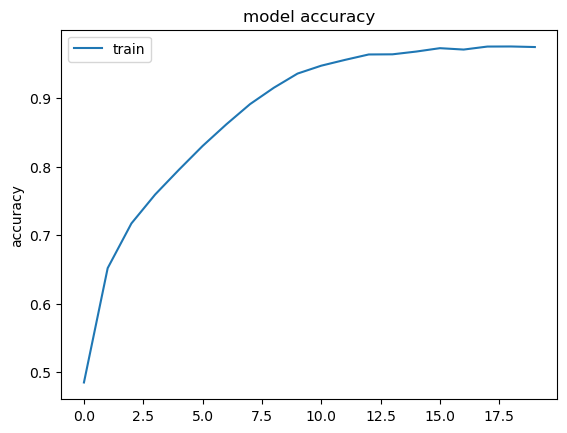

In [55]:
plt.plot(model.history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['train'], loc = 'upper left')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

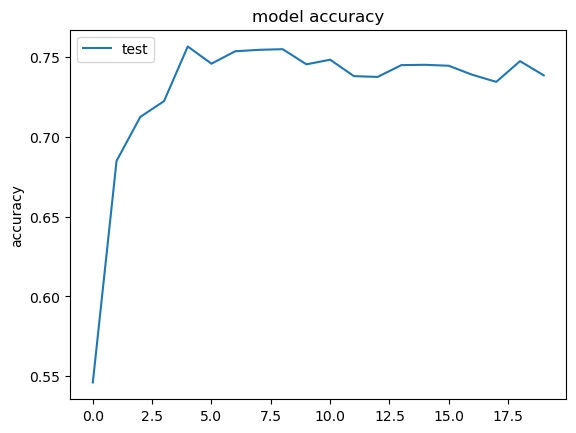

In [56]:
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.legend(['test'], loc = 'upper left')
plt.show


In [91]:

y_pred=model.predict(X_test)


313/313 [==============================] - 3s 9ms/step


In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 256)        

In [166]:
model.layers[1].get_weights()[0]

array([[[[-0.26796782, -0.12429038, -0.0913076 ,  0.18341668,
          -0.26032093, -0.16528054, -0.05721232, -0.02171859,
           0.1234401 , -0.29671612, -0.1265015 ,  0.10102991,
          -0.23427743,  0.3059669 ,  0.00824887,  0.3008711 ,
           0.22364582, -0.07675061, -0.05626643, -0.13355319,
           0.19215165,  0.08749913, -0.17808218, -0.00981881,
           0.11601294,  0.02375911, -0.11170565, -0.0267854 ,
           0.11341912,  0.01854752, -0.08840977,  0.21037704],
         [-0.06633028, -0.1272928 ,  0.16336612,  0.03290185,
          -0.13096106, -0.2290418 , -0.07640781,  0.12291531,
           0.03277737, -0.08890957, -0.04355357,  0.17616998,
          -0.02685049,  0.29646894,  0.05397078,  0.3096297 ,
          -0.07045155, -0.00319245, -0.11819018, -0.20913231,
          -0.15359765,  0.0535177 ,  0.09632115, -0.1626157 ,
           0.0499229 ,  0.1586583 , -0.04204421,  0.25848702,
           0.06177596, -0.02698888, -0.01803184,  0.01999481],
      

In [250]:
mean_filters

array([-0.00963234, -0.01308402,  0.00068428, -0.00265483,  0.00011517,
        0.00233161,  0.02133417, -0.00060931, -0.00173906, -0.0133113 ,
        0.00617312, -0.03924506, -0.06072984, -0.01009833, -0.00328115,
       -0.00441136, -0.01503596,  0.00026963, -0.00249175,  0.00692103,
       -0.01044031, -0.00811947,  0.00090096, -0.01487976, -0.00288594,
       -0.00083041, -0.00133226, -0.00573877, -0.00277358, -0.00081702,
       -0.02133066,  0.00070049], dtype=float32)

In [239]:
normalized_filters[:, :, 0, 1]

array([[-0.11120635, -0.11167555,  0.14672609],
       [-0.18823044, -0.10764395,  0.19992326],
       [ 0.16586588,  0.1138809 ,  0.02999995]], dtype=float32)

In [265]:
normalized_filters[...,1]

array([[[-0.11120635, -0.11420877, -0.11680138],
        [-0.11167555,  0.13499953,  0.205408  ],
        [ 0.14672609,  0.23751263,  0.01941927]],

       [[-0.18823044, -0.03551912, -0.05088686],
        [-0.10764395, -0.22509514, -0.13602127],
        [ 0.19992326,  0.16561252,  0.19096082]],

       [[ 0.16586588,  0.00666537,  0.24171668],
        [ 0.1138809 , -0.11135897, -0.01555029],
        [ 0.02999995, -0.2698181 , -0.26467466]]], dtype=float32)

In [292]:
normalized_filters[...,1][...,2]

array([[0.31013376, 0.721515  , 0.48405364],
       [0.39429018, 0.28559473, 0.7030695 ],
       [0.7678721 , 0.43940622, 0.12133637]], dtype=float32)

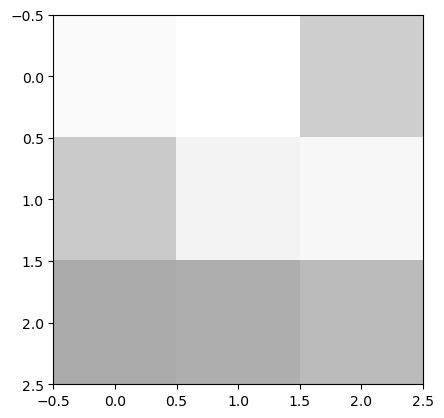

In [226]:
plt.imshow(filter_i[..., 0],cmap='gray',alpha=1.0/filter_i.shape[-1])

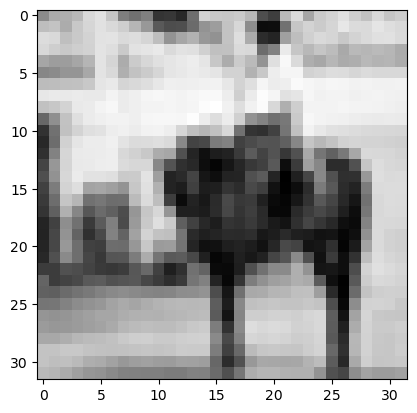

In [425]:
plt.imshow(X_train[11][...,0],cmap='gray')

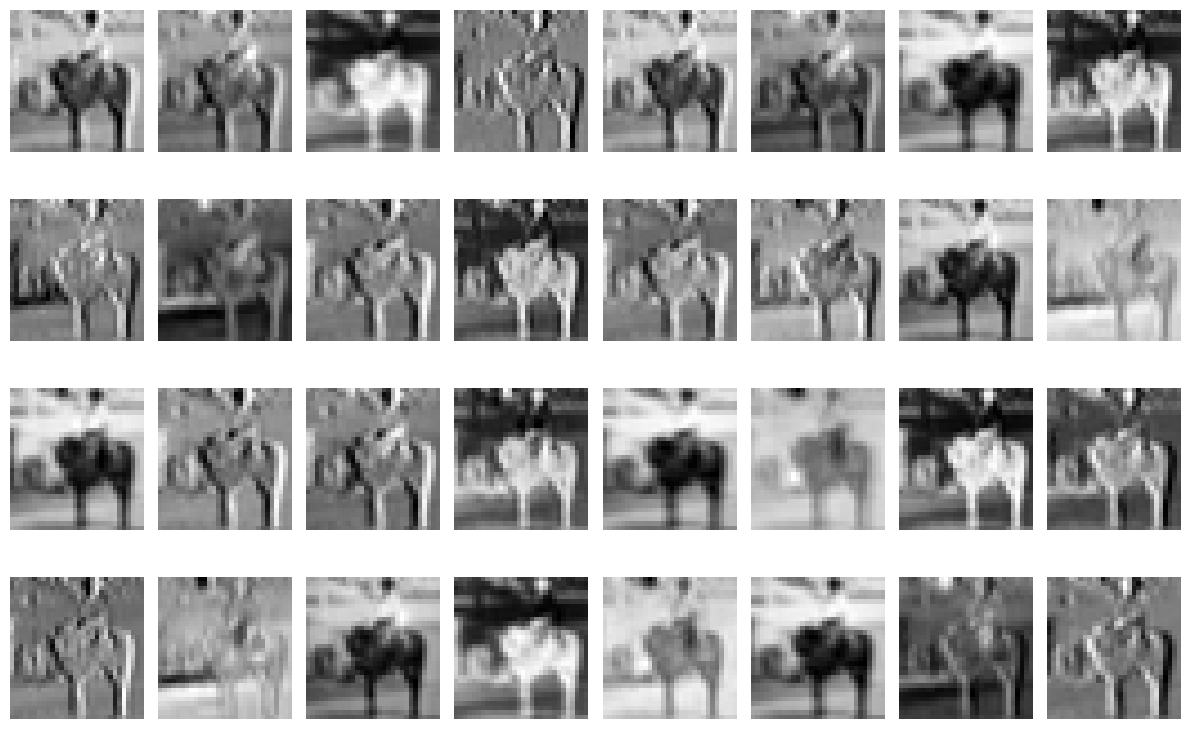

In [422]:
plt.figure(figsize=(12, 8))
for i in range(32):
    x = tf.reshape(tf.constant(X_train[11], dtype=tf.float32),[1,32,32,3])
    kernel = tf.constant(normalized_filters[...,i][...,0], dtype=tf.float32)
    kernel=tf.reshape(kernel, [1,3,3,1])
    connv=tf.nn.conv2d(x,kernel,strides=[1,1,1,1] ,padding='VALID')
    plt.subplot(4,8, i+1)
    plt.imshow(connv[0],cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [410]:
kernel

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[-0.14047422],
         [ 0.06916223],
         [ 0.11180525]],

        [[-0.1168299 ],
         [ 0.05011426],
         [-0.15710767]],

        [[ 0.10633095],
         [ 0.04724852],
         [-0.17919092]]]], dtype=float32)>

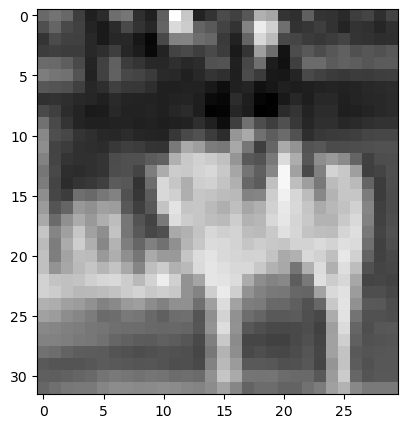

In [416]:
connv=tf.nn.conv2d(x,kernel,strides=[1,1,1,1] ,padding='VALID')
plt.figure(figsize=(5,5))
plt.imshow(connv[0],cmap='gray')

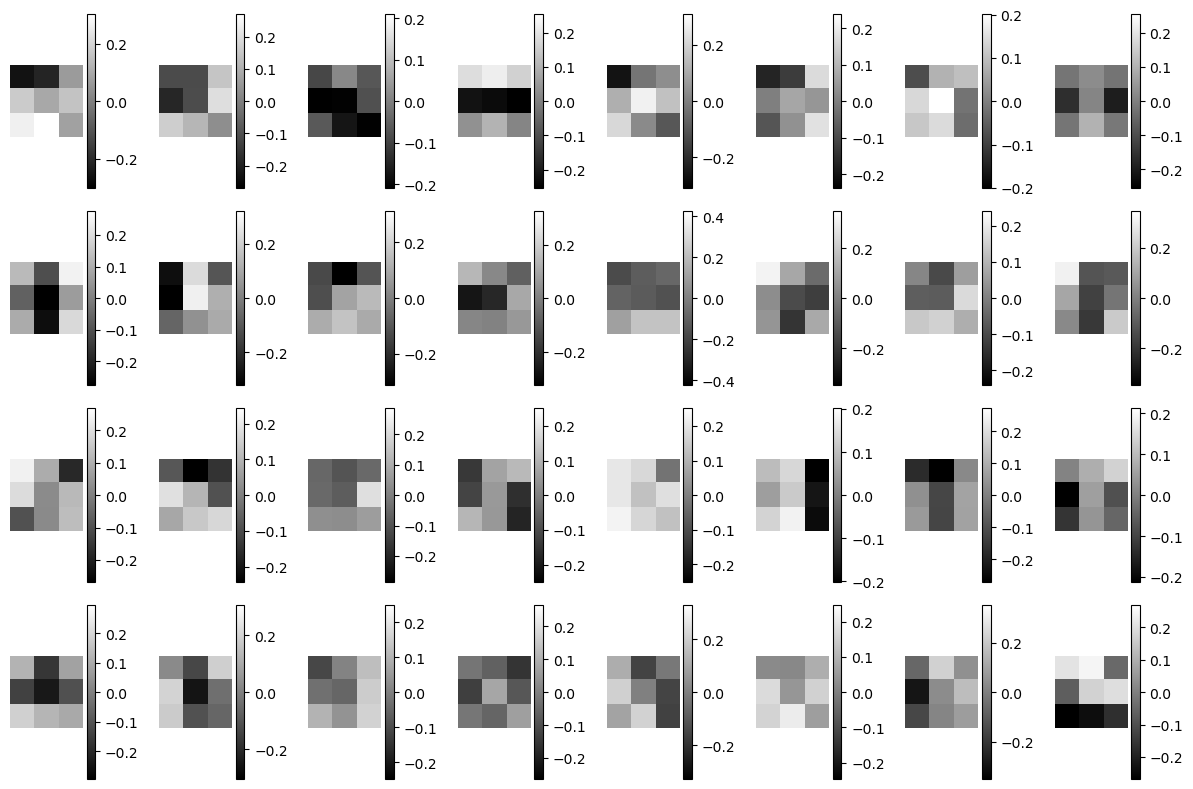

In [329]:

# Retrieve the weights of the first convolutional layer
conv_layer_weights = model.layers[1].get_weights()[0]

# Subtract the mean from each filter
mean_filters = np.mean(conv_layer_weights, axis=(0, 1, 2))
normalized_filters = conv_layer_weights - mean_filters

# Plot all 32 filters
plt.figure(figsize=(12, 8))
for i in range(normalized_filters.shape[-1]):
    filter_i = normalized_filters[..., i]  # Select i-th filter

    plt.subplot(4, 8, i + 1)
    plt.imshow(filter_i[:, :, 0], cmap='gray', vmin=-np.max(np.abs(filter_i)), vmax=np.max(np.abs(filter_i)))
    plt.colorbar()
    plt.axis('off')

plt.tight_layout()
plt.show()


The number of correct labels = 20


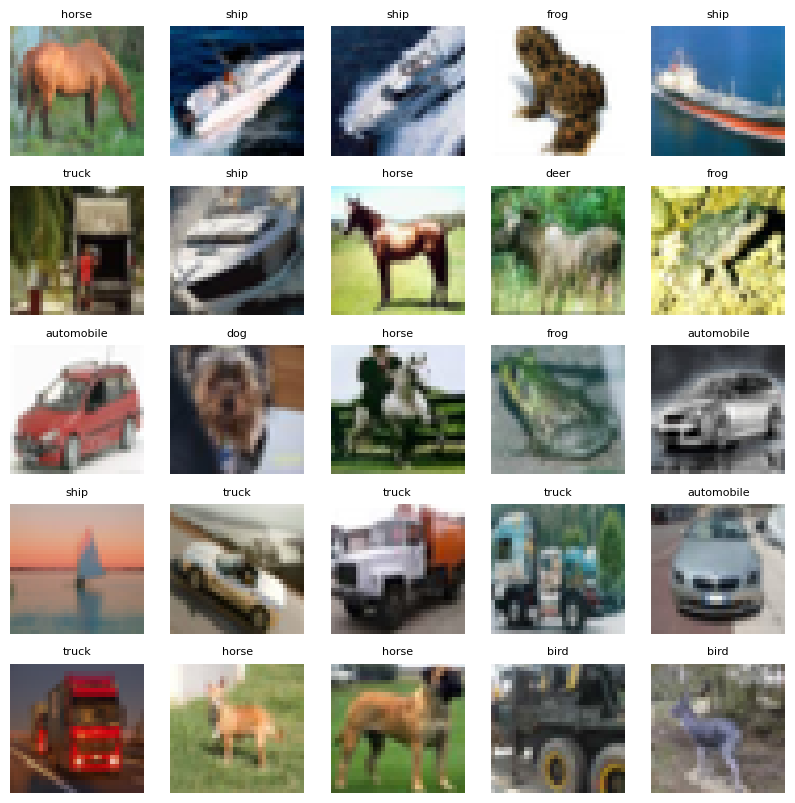

In [90]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
counter=0
# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(np.argmax(y_pred[index]))
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')
    
    if y_test[index][0]==np.argmax(y_pred[index]):
        counter=counter+1
    
print("The number of correct labels =",counter)
    